# Detection Visualization Demo of COCOAPI

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import pylab
import os
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
mydpi=96   # https://www.infobyip.com/detectmonitordpi.php

### Initialize COCO ground truth api
### only contains image info of datasets

In [2]:

dataDir='/Users/mk/Downloads/annotations/image_info_test-dev2017.json'
cocoGt=COCO(dataDir)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


### Initialize detection results api
### bbox detect results

In [3]:

resFile='/Users/mk/Downloads/R101_BEST/inference/coco_2017_test/bbox.json'
cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...
DONE (t=3.80s)
creating index...
index created!


#### Visualization and save fig

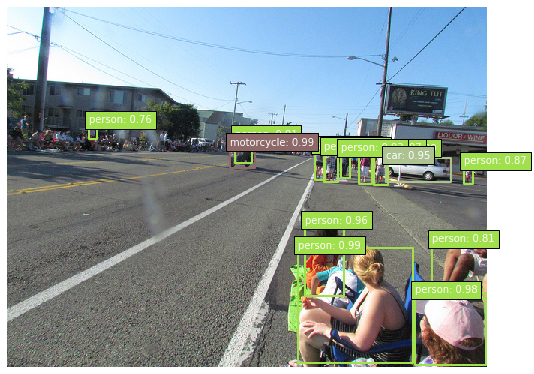

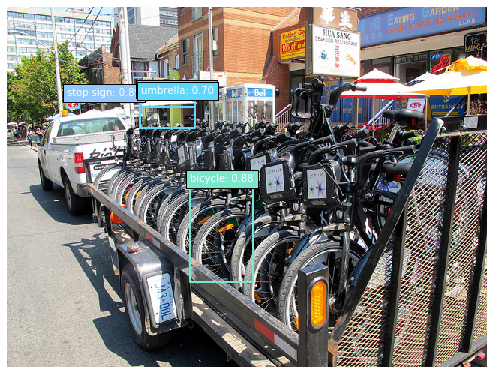

In [4]:
save_dir='/Users/mk/Desktop/R50/'
imgIds=[318, 535]
for iid in imgIds:
    # prepare image, image info, ann
    I=io.imread('/Users/mk/Desktop/selected/%012d.jpg'%iid)
    annIds=cocoDt.getAnnIds(imgIds=iid) # ann_id and anns only in cocoDt, no annotations in cocoGt
    anns=cocoDt.loadAnns(annIds)
    img=cocoGt.loadImgs(iid)[0]   # image infos
    newAnns=[]
    for item in anns:
        if item['score'] >= 0.7:
            newAnns.append(item)
    # plt stuff
    fig=plt.figure()
    fig.set_size_inches((img['width']/mydpi, img['height']/mydpi))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(I, aspect='equal')
    # see coco api
    cocoDt.showBBox(newAnns, label_box=True)    # whatever cocoDt or cocoGt
    plt.savefig(os.path.join(save_dir, 'det_%012d.jpg'%(anns[0]['image_id'])), dpi=mydpi)